In [1]:
# download the file 'problem_set_1_data.csv'
# and the execute this cell

import pandas as pd
data = pd.read_csv("C:/Users/Eddie/OneDrive/Desktop/Data Science/Ethics/problem_set_1_data.csv",sep=',')
data

,group,outcome,x1,x2
0,1,True,14.510771,19.431799
1,0,False,11.404356,3.332700
2,1,False,10.526163,4.323102
3,1,True,10.841790,21.453620
4,0,False,-1.902080,-10.871900
...,...,...,...,...
19995,1,False,8.816086,10.895516
19996,1,False,10.790022,4.843957
19997,0,False,12.043766,5.087219
19998,1,True,22.548743,17.227402


For this problem we’ll use the toy dataset ``problem_set_1_data.csv`. Each row represents a person belonging to one of two demographic groups, denoted by the binary group variable. The task is to predict the binary out­come variable using the continuous features $x_1$ and $x_2$, and possibly also using group.

Given a classifier $f$ and a dataset $D$, let’s define the demographic disparity of the classifier as the absolute difference in the probability of positive classification for the two groups:

$$ |P(\hat Y = 1|X\in G^+) - P(\hat Y = 1|X\in G^-)|$$

Disparity varies from 0 to 1. If it is 0, we say that the classifier satisfies demographic parity.

**Notes and hints**:
+ Partition the data into training and validation sets, and report all accuracies and disparities on the validation set. You might want to use k-fold cross validation.
+ Report any regularization parameter that you used for logistic regression.
+ The choice of ML library, etc. is up to you.


1. Train a logistic regression classifier to predict outcome given $x_1$ and $x_2$. Report its accuracy and demographic disparity. Accuracy refers to the fraction of instances classified correctly.

In [3]:
# Data preparing 
from sklearn.model_selection import train_test_split, KFold

data['outcome'] = data['outcome'].replace({True: 1, False: 0}) # replacing the target variable with 1 and 0
y=data['outcome']
X=data.drop(['outcome'], axis=1) 


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

k=5 # number of folds

clf = LogisticRegression(penalty='l2')

kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
accuracies = []
disparities = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train[['x1', 'x2']], y_train) 
    
    y_pred = clf.predict(X_test[['x1', 'x2']]) 

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    pos_class=len(X_test[X_test['group']==1]) 
    neg_class=len(X_test[X_test['group']==0]) 
    X_test['prediction'] = y_pred
    Pos_prediction=X_test[X_test['prediction']==1] 
    
    disparity = abs(len(Pos_prediction[Pos_prediction['group'] == 1]) / pos_class - len(Pos_prediction[Pos_prediction['group'] == 0]) / neg_class)
    disparities.append(disparity)


In [120]:
# Print the results

print('The mean accuracy in predicting the outcome is: ', sum(accuracies) / len(accuracies))
print('The disparity in the prediction outcome is: : ', sum(disparities) / len(disparities))


The mean accuracy in predicting the outcome is:  0.73555
The disparity in the prediction outcome is: :  0.17335059678253978


2. One of the features $x_1$ and $_2$ is a proxy for group membership (i.e., it correlates with group). Which feature is it? Train a classifier without that feature (i.e., using only a single feature). Report the accuracy and demographic disparity.

In [ ]:
# To distinguish between x_1, x_2 let us train separately two classifiers respectively with just x_1 and x_2 and check the results.

# Using the first feature

accuracies_1 = []
disparities_1 = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train[['x1']], y_train) 
    
    y_pred = clf.predict(X_test[['x1']]) # we just use the first two variables

    accuracy = accuracy_score(y_test, y_pred)
    accuracies_1.append(accuracy)
    
    pos_class=len(X_test[X_test['group']==1]) # elements in the positive class
    neg_class=len(X_test[X_test['group']==0]) # elements in the negative class
    X_test['prediction'] = y_pred
    Pos_prediction=X_test[X_test['prediction']==1] # Dataset with positive prediction
    
    disparity = abs(len(Pos_prediction[Pos_prediction['group'] == 1]) / pos_class - len(Pos_prediction[Pos_prediction['group'] == 0]) / neg_class)
    # We compute the disparity according to the formula: P(Y=1,G=+)/P(G=+) positive group and prediction=1 over the positive group - P(Y=1,G=-)/P(G=-)
    disparities_1.append(disparity)

In [122]:
print('The mean accuracy in predicting the outcome is: ', sum(accuracies_1) / len(accuracies_1))
print('The disparity in the prediction outcome is: : ', sum(disparities_1) / len(disparities_1))

The mean accuracy in predicting the outcome is:  0.70725
The disparity in the prediction outcome is: :  0.27815503814046705


In [ ]:
# Using the second feature
accuracies_2 = []
disparities_2 = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train[['x2']], y_train) 
    
    y_pred = clf.predict(X_test[['x2']]) # we just use the first two variables

    accuracy = accuracy_score(y_test, y_pred)
    accuracies_2.append(accuracy)
    
    pos_class=len(X_test[X_test['group']==1]) # elements in the positive class
    neg_class=len(X_test[X_test['group']==0]) # elements in the negative class
    X_test['prediction'] = y_pred
    Pos_prediction=X_test[X_test['prediction']==1] # Dataset with positive prediction
    
    disparity = abs(len(Pos_prediction[Pos_prediction['group'] == 1]) / pos_class - len(Pos_prediction[Pos_prediction['group'] == 0]) / neg_class)
    # We compute the disparity according to the formula: P(Y=1,G=+)/P(G=+) positive group and prediction=1 over the positive group - P(Y=1,G=-)/P(G=-)
    disparities_2.append(disparity)

In [124]:
print('The mean accuracy in predicting the outcome is: ', sum(accuracies_2) / len(accuracies_2))
print('The disparity in the prediction outcome is: : ', sum(disparities_2) / len(disparities_2))

The mean accuracy in predicting the outcome is:  0.6908000000000001
The disparity in the prediction outcome is: :  0.00864235981381537


While the accuracy is approximatively the same, we can see a significant difference in the disparity measure. The second feature does not contribute in the disparity while the fhe first one does.

3. Suppose we wish to achieve a tunable tradeoff between accuracy and demographic disparity. One way to do this is to add a term to the loss function that measures the disparity of $f$. Write a formula for such a loss function term and explain it.

**Notes and hints**:
The training set disparity is a good start, but it is tough to optimize because it has discontinuities when a training point falls on the decision boundary. Can you come up with a continuous analog of the training set disparity?

ANSWER: Let us denote the loss function by $Loss$, in order to regularize the demographic disparity $d$, we wish to apply a term that takes into account it:
$$ L_{new}=Loss+\lambda \cdot d  \quad \lambda \in \mathbb{R}$$
where
$$
d=|P(\hat Y = 1|X\in G^+) - P(\hat Y = 1|X\in G^-)| 
$$
for $X$ in the training set. However, as pointed out, this is hard to optimize as it presents discontinuities. We can consider the following penalization term: let us denote with $\tilde{d}$
$$
\tilde{d}=\Bigl(\frac{P(\hat Y = 1,X\in G^+)}{P(X\in G^+)}-\frac{P(\hat Y = 1,X\in G^-)}{P(X\in G^-)}\Bigr)^2.
$$
The new loss function is 
$$
L_{new}=Loss+\lambda \cdot \ln(1+\tilde{d}) \quad \lambda \in \mathbb{R}
$$

Since computing the gradient it is very hard for this function we use the numerical approximation:
$$ 
 f'(x)\approx \frac{(x+h)-f(x-h)}{2h}
$$

4. Train a model with this loss function.  Gradually vary the strength of this disparity term in the loss function and optimize the resulting loss function each time. Use this to plot a curve showing the achievable tradeoff between accuracy (on the $y$-axis) and disparity (on the $x$-axis).

**Notes and hints**:
When the disparity strength is 0, you should recover the accuracy that you reported for part (1).




In [105]:
import numpy as np

class my_model():
    
    
    def __init__(self, learning_rate=0.001, n_iters=100, l=0.01):
        self.l=l
        self.learning_rate=learning_rate
        self.n_iters=n_iters
        self.bias=None
        self.weights=None
        self.final_weights = []

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, X, weights=None):
        if weights is None:
            weights = self.weights
            
        thr = 0.5

        y_hat = np.dot(X[['x1', 'x2']], weights.reshape(-1,1)) + self.bias
        y_pred=np.where(self.sigmoid(y_hat.flatten()) > thr, 1, 0)  # we compute the right prediction.
        return y_pred

    
    def disparity(self, X, weights=None):
        
        if weights is None:
            weights = self.weights
        
        pos_class = len(X[X['group'] == 1])
        neg_class = len(X[X['group'] == 0])
        X['prediction'] = self.predict(X, weights)
        pos_group = len(X[(X['prediction'] == 1) & (X['group'] == 1)])
        neg_group = len(X[(X['prediction'] == 1) & (X['group'] == 0)])
        demographic_disparity = (pos_group / pos_class) - (neg_group / neg_class)**2
        
        disparity_pen = self.l * np.log(1 + demographic_disparity)

        return disparity_pen
    
    def gradient_disparity(self,X):  # Numerical approximation for the gradient.
        h = 1
        weights_plus_h = self.weights + h
        weights_minus_h = self.weights - h
        disparity_plus_h = self.disparity(X, weights_plus_h)
        disparity_minus_h = self.disparity(X, weights_minus_h)
        grad_approx = (disparity_plus_h - disparity_minus_h) / (2 * h)
        return grad_approx

    
    def feed_forward(self,X):
        z = np.dot(X[['x1', 'x2']], self.weights) + self.bias
        A = self.sigmoid(z)
        return A
    
    def fit(self, X, y):
        
        np.random.seed(42)
        
        # initialization

        self.weights = np.random.randn(2) # we take as many weights as x_1,x_2
        self.bias=0

        binary_loss = []
        disparity_losses = []
        acc= []

        for _ in range(self.n_iters):
            
            A = self.feed_forward(X)
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            dw = (1 / X.shape[0]) * np.dot(X[['x1','x2']].T, dz)
            db = (1 / X.shape[0]) * np.sum(A - y)
            # update parameters
            
            grad_disp = self.gradient_disparity(X)  # Demographic penalization
            self.weights -= self.learning_rate * (dw + grad_disp)
            self.bias -= self.learning_rate * db
        
            binary_l, disparity_loss, accuracy = self.metrics(y, self.predict(X), X)
            acc.append(accuracy)
            binary_loss.append(binary_l)
            disparity_losses.append(disparity_loss)
            self.final_weights.append(self.weights)

    
        return binary_l, disparity_losses,acc # So that I can save the losses and check it! 
    
    
    def metrics(self, y_true, y_pred, X): 
        eps = 1e-9
        binary_loss= -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps)) 
        correct_predictions = np.sum(y_true == y_pred)
        accuracy = correct_predictions / len(y_true)
        
        disparity_loss = self.disparity(X)
        
        return binary_loss, disparity_loss, accuracy



Since I checked that K fold does not improve significantly the accuracy, I am using for simplicity a random split with train_size=$0.9$. It is interesting that giving more stenght to the parameter $l$ of my model, the disparity actually as a strong decrease. The values of $l$ are very high becuase the variable grad_approx attains small values compared to the gradient of binary cross entropy.
In the following lines of code, we show the tradeoff between accuracy and disparity for various $l$ and plot the results

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.9, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.9, random_state=42)

lambdas=np.arange(50,3000,200) # some l to give more strenght to the disparity loss.

acc=[]
disp=[]

for lamb in lambdas:
    logistic=my_model(learning_rate=0.001, n_iters=100,l=lamb)
    _, _, _= my_model.fit(logistic, X_train,y_train)
    y_pred=my_model.predict(logistic,X_test)
    _,_,accu=my_model.metrics(logistic,y_test,y_pred,X_test)
    acc.append(accu)
    pos_class=len(X_test[X_test['group']==1]) 
    neg_class=len(X_test[X_test['group']==0])
    X_test['prediction'] = y_pred
    Pos_prediction=X_test[X_test['prediction']==1] 
    disparity = abs(len(Pos_prediction[Pos_prediction['group'] == 1]) / pos_class - len(Pos_prediction[Pos_prediction['group'] == 0]) / neg_class)
    disp.append(disparity)

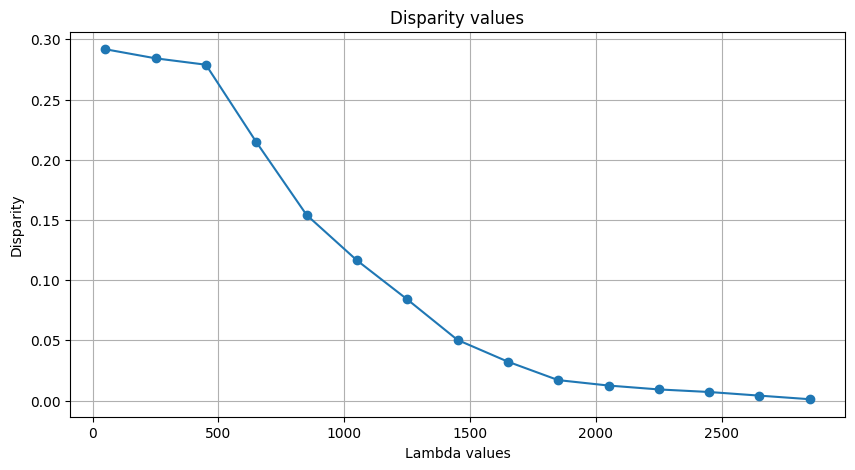

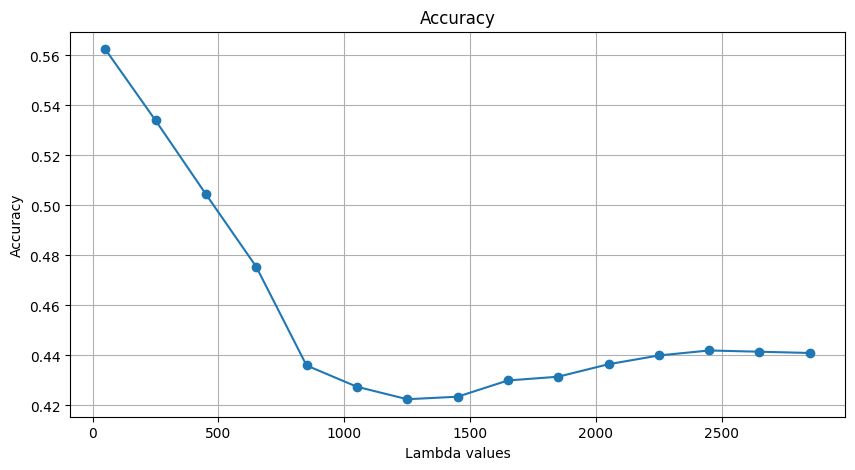

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(lambdas, disp, marker='o', linestyle='-')
plt.title('Disparity values')
plt.xlabel('Lambda values')
plt.ylabel('Disparity')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(lambdas, acc, marker='o', linestyle='-')
plt.title('Accuracy')
plt.xlabel('Lambda values')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


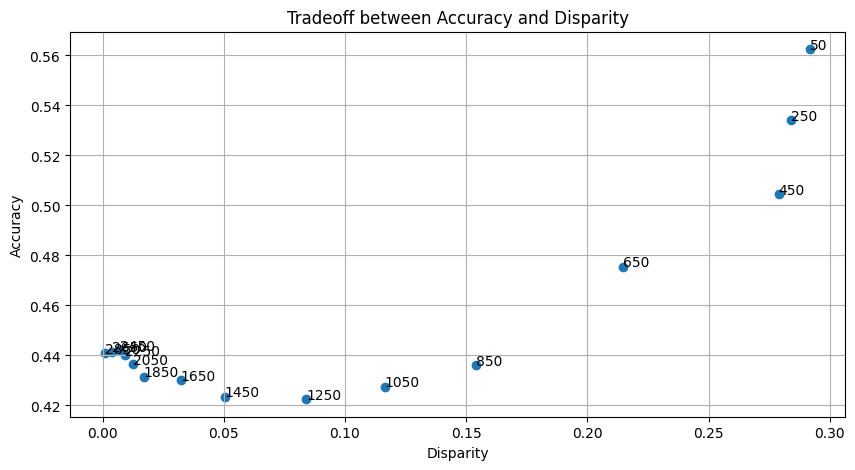

In [103]:
plt.figure(figsize=(10, 5))
plt.scatter(disp, acc)
plt.title('Tradeoff between Accuracy and Disparity')
plt.xlabel('Disparity')
plt.ylabel('Accuracy')
plt.grid(True)

for i, lamb in enumerate(lambdas):
    plt.text(disp[i], acc[i], str(lamb))

plt.show()

It is clear when plotting the results, that a good values is for $2000<\lambda<3000$ which solve the tradeoff between disparity and accuracy. The accuracy it is clearly greater for small values of $\lambda$.

### Alternative Answer 4

Since we know that the variable that mostly causes the demographic non parity is $x_1$ we can modify the model in order to give to it less importance. To do so, we just update the weight of $x_1$ by doing dw[0] += self.l * self.weights[0]

In [67]:
class my_model_reg():
    
    def __init__(self, learning_rate=0.001, n_iters=100, l=0.5):
        self.l=l
        self.learning_rate=learning_rate
        self.n_iters=n_iters
        self.bias=None
        self.weights=None
        self.losses = []


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self,X):
        z = np.dot(X[['x1', 'x2']], self.weights) + self.bias
        A = self.sigmoid(z)
        return A

    def fit(self, X, y):
        
        n_samples=X.shape[0]
        self.weights = np.zeros(2)
        self.bias = 0

        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz = A - y 
            dw = (1 / n_samples) * np.dot(X[['x1', 'x2']].T, dz)
            db = (1 / n_samples) * np.sum(dz)
            dw[0] += self.l * self.weights[0] # SO WE PENALIZE x_1!
            
            self.weights -= self.learning_rate* dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X[['x1', 'x2']], self.weights) + self.bias
        y_predicted = self.sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)

In [71]:
def acc_score(y_true,y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

lambdas=np.arange(1,100,10) # some l to give more strenght to the x1 penalization

acc=[]
disp=[]

for lamb in lambdas:
    model=my_model_reg(learning_rate=0.001, n_iters=100,l=lamb)
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    accuracy = acc_score(y_test,y_pred)
    acc.append(accuracy)
    pos_class=len(X_test[X_test['group']==1]) 
    neg_class=len(X_test[X_test['group']==0]) 
    X_test['prediction'] = y_pred
    Pos_prediction=X_test[X_test['prediction']==1] 
    disparity = abs(len(Pos_prediction[Pos_prediction['group'] == 1]) / pos_class - len(Pos_prediction[Pos_prediction['group'] == 0]) / neg_class)
    disp.append(disparity)

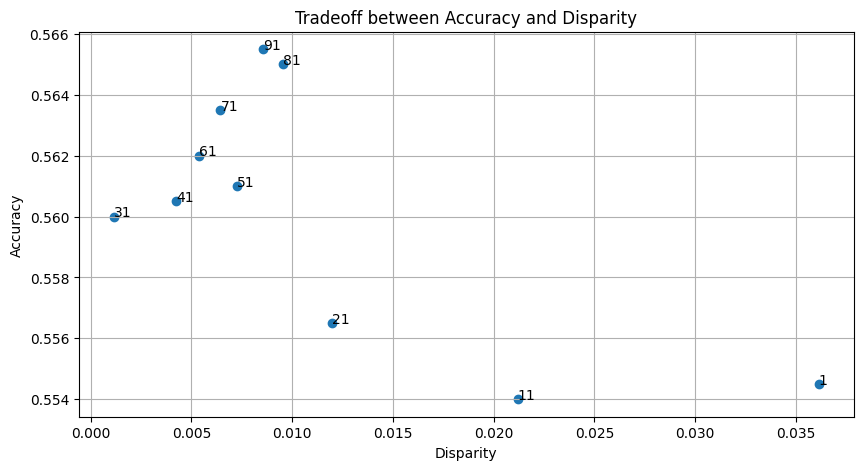

In [73]:
plt.figure(figsize=(10, 5))
plt.scatter(disp, acc)
plt.title('Tradeoff between Accuracy and Disparity')
plt.xlabel('Disparity')
plt.ylabel('Accuracy')
plt.grid(True)

for i, lamb in enumerate(lambdas):
    plt.text(disp[i], acc[i], str(lamb))

plt.show()

With this alternative model, we can reach a better tradeoff between accuracy and disparity. It works better than before.

5. Repeat part (4), but with group as an additional feature (i.e., train a classifier to predict outcome based on $x_1$, $x_2$, and $group$, using the modified loss function).


In [119]:
# I JUST CHANGED X[['x1','x2']] to X[['group','x1','x2']] because we want to use also group!

class my_model_full():
    
    
    def __init__(self, learning_rate=0.001, n_iters=100, l=0.01):
        self.l=l
        self.learning_rate=learning_rate
        self.n_iters=n_iters
        self.bias=None
        self.weights=None
        self.final_weights = []

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, X, weights=None):
        if weights is None:
            weights = self.weights
            
        thr = 0.5
        y_hat = np.dot(X[['group','x1','x2']], weights) + self.bias
        y_pred=np.where(self.sigmoid(y_hat.flatten()) > thr, 1, 0)  # we compute the right prediction.
        return y_pred

    
    def disparity(self, X, weights=None):
        
        if weights is None:
            weights = self.weights
        
        pos_class = len(X[X['group'] == 1])
        neg_class = len(X[X['group'] == 0])
        X['prediction'] = self.predict(X, weights)
        pos_group = len(X[(X['prediction'] == 1) & (X['group'] == 1)])
        neg_group = len(X[(X['prediction'] == 1) & (X['group'] == 0)])
        demographic_disparity = (pos_group / pos_class) - (neg_group / neg_class)**2
        
        disparity_pen = self.l * np.log(1 + demographic_disparity)

        return disparity_pen
    
    def gradient_disparity(self,X):  # Numerical approximation for the gradient.
        h = 1
        weights_plus_h = self.weights + h
        weights_minus_h = self.weights - h
        disparity_plus_h = self.disparity(X, weights_plus_h)
        disparity_minus_h = self.disparity(X, weights_minus_h)
        grad_approx = (disparity_plus_h - disparity_minus_h) / (2 * h)
        return grad_approx

    
    def feed_forward(self,X):
        z = np.dot(X[['group','x1','x2']], self.weights) + self.bias
        A = self.sigmoid(z)
        return A
    
    def fit(self, X, y):
        
        np.random.seed(42)
        
        # initialization

        self.weights = np.random.randn(3) 
        self.bias=0

        binary_loss = []
        disparity_losses = []
        acc= []

        for _ in range(self.n_iters):
            
            A = self.feed_forward(X)
            dz = A - y 
            # compute gradients
            dw = (1 / X.shape[0]) * np.dot(X[['group','x1','x2']].T, dz)
            db = (1 / X.shape[0]) * np.sum(A - y)
            # update parameters
            
            grad_disp = self.gradient_disparity(X)  # Demographic penalization
            self.weights -= self.learning_rate * (dw + grad_disp)
            self.bias -= self.learning_rate * db
        
            binary_l, disparity_loss, accuracy = self.metrics(y, self.predict(X), X)
            acc.append(accuracy)
            binary_loss.append(binary_l)
            disparity_losses.append(disparity_loss)
            self.final_weights.append(self.weights)

    
        return binary_l, disparity_losses,acc # So that I can save the losses and check it! 
    
    
    def metrics(self, y_true, y_pred, X): 
        eps = 1e-9
        binary_loss= -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps)) 
        correct_predictions = np.sum(y_true == y_pred)
        accuracy = correct_predictions / len(y_true)
        
        disparity_loss = self.disparity(X)
        
        return binary_loss, disparity_loss, accuracy

In [120]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.9, random_state=42)

lambdas=np.arange(50,3000,200) # some l to give more strenght to the disparity loss.

acc=[]
disp=[]

for lamb in lambdas:
    logistic=my_model_full(learning_rate=0.001, n_iters=100,l=lamb)
    _, _, _= my_model_full.fit(logistic, X_train,y_train)
    y_pred=my_model_full.predict(logistic,X_test)
    _,_,accu=my_model_full.metrics(logistic,y_test,y_pred,X_test)
    acc.append(accu)
    pos_class=len(X_test[X_test['group']==1]) 
    neg_class=len(X_test[X_test['group']==0])
    X_test['prediction'] = y_pred
    Pos_prediction=X_test[X_test['prediction']==1] 
    disparity = abs(len(Pos_prediction[Pos_prediction['group'] == 1]) / pos_class - len(Pos_prediction[Pos_prediction['group'] == 0]) / neg_class)
    disp.append(disparity)

We use now the same values of $\lambda$ to make comparison. In the model I defined, the accuracy is generally lower but more stable, while the disparity as we can expect does not get lower values as previously.

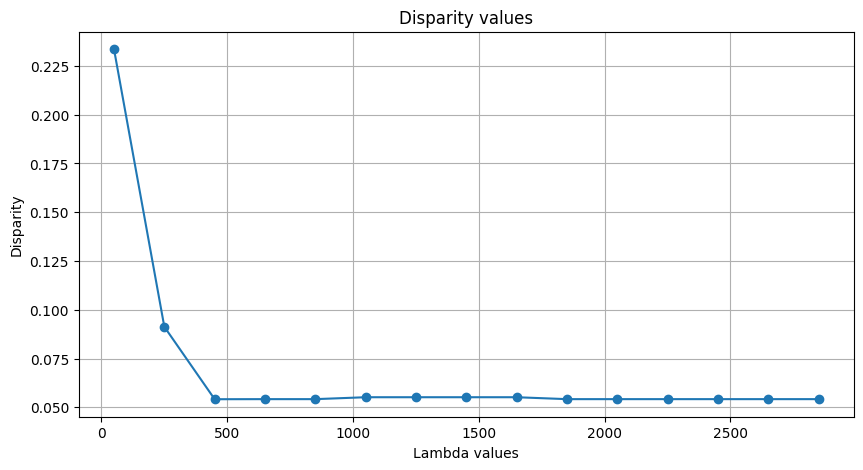

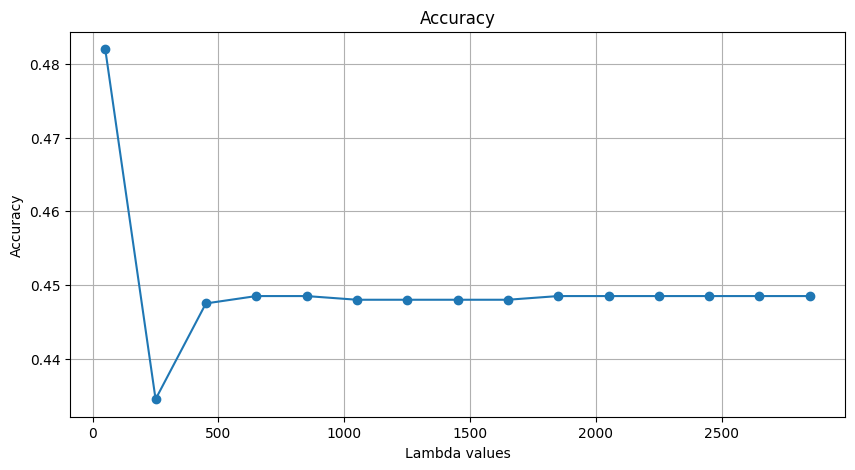

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(lambdas, disp, marker='o', linestyle='-')
plt.title('Disparity values')
plt.xlabel('Lambda values')
plt.ylabel('Disparity')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(lambdas, acc, marker='o', linestyle='-')
plt.title('Accuracy')
plt.xlabel('Lambda values')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


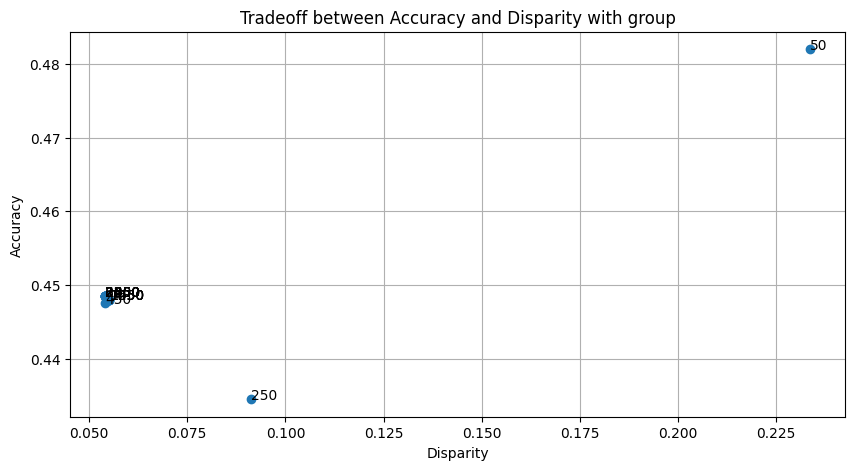

In [122]:
plt.figure(figsize=(10, 5))
plt.scatter(disp, acc)
plt.title('Tradeoff between Accuracy and Disparity with group')
plt.xlabel('Disparity')
plt.ylabel('Accuracy')
plt.grid(True)

for i, lamb in enumerate(lambdas):
    plt.text(disp[i], acc[i], str(lamb))

plt.show()

### Using the alternative model

In [74]:
class my_model_reg_full():
    
    def __init__(self, learning_rate=0.001, n_iters=100, l=0.5):
        self.l=l
        self.learning_rate=learning_rate
        self.n_iters=n_iters
        self.bias=None
        self.weights=None
        self.losses = []


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self,X):
        z = np.dot(X[['group','x1','x2']], self.weights) + self.bias
        A = self.sigmoid(z)
        return A

    def fit(self, X, y):
        
        n_samples=X.shape[0]
        self.weights = np.zeros(3)
        self.bias = 0

        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz = A - y 
            dw = (1 / n_samples) * np.dot(X[['group','x1','x2']].T, dz)
            db = (1 / n_samples) * np.sum(dz)
            dw[0] += self.l * self.weights[1] # SO WE PENALIZE x_1!
            
            self.weights -= self.learning_rate* dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X[['group','x1','x2']], self.weights) + self.bias
        y_predicted = self.sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)

In [75]:
acc=[]
disp=[]

for lamb in lambdas:
    model=my_model_reg_full(learning_rate=0.001, n_iters=100,l=lamb)
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    accuracy = acc_score(y_test,y_pred)
    acc.append(accuracy)
    pos_class=len(X_test[X_test['group']==1]) 
    neg_class=len(X_test[X_test['group']==0]) 
    X_test['prediction'] = y_pred
    Pos_prediction=X_test[X_test['prediction']==1] 
    disparity = abs(len(Pos_prediction[Pos_prediction['group'] == 1]) / pos_class - len(Pos_prediction[Pos_prediction['group'] == 0]) / neg_class)
    disp.append(disparity)

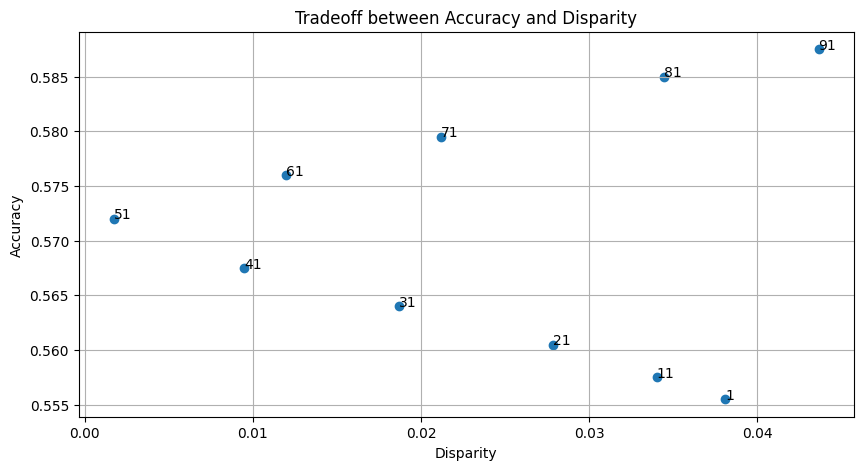

In [76]:
plt.figure(figsize=(10, 5))
plt.scatter(disp, acc)
plt.title('Tradeoff between Accuracy and Disparity')
plt.xlabel('Disparity')
plt.ylabel('Accuracy')
plt.grid(True)

for i, lamb in enumerate(lambdas):
    plt.text(disp[i], acc[i], str(lamb))

plt.show()

As we expected, for the same values of $l$ the accuracy is a little bit better, but the disparity is higher because the variable 'group' encodes this disparity

6.  In parts (4) and (5), how do the coefficients of $x_1$, $x_2$, and $group$ change as the strength of the disparity term in the loss function increases? Give an intuitive explanation for why the coefficients change the way they do.

ANSWER:

In [ ]:
lambdas=np.arange(50,3000,200) 
final_weights_per_lambda = []

for lamb in lambdas:
    logistic = my_model(learning_rate=0.001, n_iters=100, l=lamb)
    _, _, _ = logistic.fit(X_train, y_train)
    final_weights_per_lambda.append(logistic.final_weights[-1])

From the values of the two weights, it is clear that in reducing the disparity, we give more strenght to the second variable because it is the first one that contributes to the disparity!

In [110]:
final_weights_per_lambda

[array([ 0.20539158, -0.24262376]),
 array([-0.65002408, -1.22122068]),
 array([-1.03265841, -1.64313741]),
 array([-1.11317616, -1.73663045]),
 array([-1.19849532, -1.82861576]),
 array([-1.27471599, -1.90899647]),
 array([-1.34236785, -1.97952363]),
 array([-1.41164418, -2.05091005]),
 array([-1.47656518, -2.11743381]),
 array([-1.53428261, -2.17655955]),
 array([-1.57892475, -2.22228383]),
 array([-1.61321161, -2.25740014]),
 array([-1.64618565, -2.29106958]),
 array([-1.68908287, -2.33485015]),
 array([-1.7122848 , -2.35838175])]

In [123]:
lambdas=np.arange(50,3000,200) 
final_weights_per_lambda = []

for lamb in lambdas:
    logistic = my_model_full(learning_rate=0.001, n_iters=100, l=lamb)
    _, _, _ = logistic.fit(X_train, y_train)
    final_weights_per_lambda.append(logistic.final_weights[-1])

In [124]:
final_weights_per_lambda

[array([ 0.27343068, -0.29011648,  0.28158132]),
 array([-0.5352211 , -0.68351646, -0.0556764 ]),
 array([-1.06287985, -1.12672498, -0.44781716]),
 array([-1.15817144, -1.19055098, -0.49243474]),
 array([-1.18042285, -1.19596557, -0.48857054]),
 array([-1.19426042, -1.19943299, -0.48653961]),
 array([-1.20415132, -1.20214698, -0.48559422]),
 array([-1.21083051, -1.2036602 , -0.48451183]),
 array([-1.21640558, -1.20527611, -0.48416428]),
 array([-1.22011657, -1.2059269 , -0.48329261]),
 array([-1.22321387, -1.20652989, -0.48266922]),
 array([-1.22522946, -1.20647191, -0.48161416]),
 array([-1.2275478 , -1.2071166 , -0.48147026]),
 array([-1.22954632, -1.20767547, -0.48132469]),
 array([-1.23128464, -1.20817412, -0.48123587])]

In the model I stated, it seems to be that the variable group is confusing the model and does not lead to any good interpretation as before. I would expect that for another model, the weights for both group and x_1 becomes smaller in order to reduce the disparity, but somehow remain big to improve accuracy. In order term they should show the tradeoff.

For the second model, showing the weights does not provide any insight as we "manually" reduced them in order to obtain a good tradeoff, so we lose the interpretability.

7. Comparing your accuracy-vs-disparity curves in parts (4) and (5), which option gives a better tradeoff: using $group$ or not using $group$?


ANSWER: In the first model I stated, the better tradeoff is achieved without using group because we reach smaller values of disparity. For the same values of $\lambda$ it is true that the accuracy is the same, but considering the tradeoff we conclue that with my model is better if we do not use group

In the second model, the better tradeoff is still attained without using group.

8. Describe a decision-making scenario that might have led to this toy problem. Specifically, state what the outcome, $x_1$, $x_2$, and $group$ variables are. In this scenario, describe which classifier (if any) would you use and what factors would you consider in making your choice.


ANSWER:

The outcome could be whether or not an applicant has been approved for a financial loan. For example, a True value might indicate that the loan was approved, while a False value might indicate that the loan was refused. The variables can be explained as it follows:

- $x_1,x_2$: could represent characteristics of applicants that may influence the likelihood of loan approval. For example, $x_1$ could represent the applicant's annual income, while $x_2$ could represent their credit score;
- group: this variable could represent whether applicants belong to one of two demographic groups, for instance men and women. It may be related to certain socio-economic or statistical characteristics that could influence the probability of loan approval. We saw previously that $x_1$ encodes the group feature and this is consistent with our interpretation of male/female and the annual's income.

In this scenario, it is clear that in deciding which classifier we use, we should take into account several aspects:
- the trade-off between accuracy and fairness. We would like a model that is accurate in predicting lending decisions, but also fair and non-discriminatory towards different demographic groups.
- We should also evaluate the interpretability of the model and its ability to explain lending decisions to human decision-makers. This is desirable in order to provide explanation to people if their loan is rejected.
- we should consider the costs and benefits of using the model, in particular potential ethical issues since we are using gender as a feature

Considering all the above, and in accordance to what we stated in class, I consider this scenario, if it descriptive of our toy case, as an high risk/unacceptable risk case (I am reffering to EU AI act) so that it is better to avoid using algorithm in this case and let human decide. This may not solve any bias problem but we can guarantee better transparency and act directly in reducing the demographic disprarity.

### Insights and further ideas

In the previous exercises we saw the direct relationship of a variable to a fairness measure. More specifically, we saw that the variable $x_1$ was related to the measure $D$ of demographic parity. Let us fix an hypothesis space $f_W$ such that we aim to predict a certain property $p$ such as the outcome by using a given set of functions. 
In a general context, we aim at minimizing according to a certain loss function defined on the dataset and the hypothesis space
$$
|p(x_1,\ldots,x_n)-f_W(x_1,\ldots,x_n)|
$$
where $p(x_1,\ldots,x_n)$ is the property we aim to recover from the dataset, $f_W$ is a set of functions depending on some hyperparameters, $x_1,\ldots,x_n$ are the features. 

Now, let us assume, from prior analysis, that there exists a certain feature $x_s$ for $s \in \{1,\ldots,n\}$ that is responsible for a bad behaviour of a certain fairness measure. Our aim is to mitigate this effect while not loosing to much accuracy, or any other relevant measure. First of all, a good starting point would be to construct the correlation matrix
$$
\begin{pmatrix}
\text{corr}(x_1,x_1) & \cdots & \text{corr}(x_1,x_n) \\
\text{corr}(x_2,x_1) & \cdots & \text{corr}(x_2,x_n) \\
\vdots &  & \vdots\\
\text{corr}(x_n,x_1) & \cdots & \text{corr}(x_n,x_n) \\
\end{pmatrix}
$$

In this way, we can understand which other features are related to $x_s$ responsible for the bad value of a fairness measure. The next step is to apply a regularization factor on our Loss function $Loss$, more specifically we can use the $L_1$ regularization:
$$
\min_{w} Loss+\lambda \sum |w_i|
$$
where $w_i$ is a parameter. Now, a desirable idea would be to regularize only a certain subset of features that are related to the fairness measure. In other words, we want to penalize just some features. However, from a mathematical point of view it is better to mantain the dimension and use the $L_1$ regularization on all the parameters and then rebalancing this effect: to be more clear let us say that we want to reduce just $w_s$. From the $L_1$ regularization we obtain a $\lambda=0.5$ for instance, then all the features, except for $x_s$ will be multiplied by $2$ (a normalization may be then applied in order to prevent too high values). In this way we are just penalizing the target features. Now, our question would be how to compute the $\lambda$ such that the fairness measure attain better values: since it is very though to compute gradients, one simple idea may be using the Nelder-Mead algorithm. The fairness measure is a function on $g(x_1,\ldots,x_n)$ because $x_1,\ldots,x_n$ are responsible for generating the prediction, then, we can apply Nelder-Mead on the function $g$ and given some parameters $\lambda_1,\ldots,\lambda_m$ 


